## **Anomaly Detection & Time Series | Vikaash Kumar | wiryvikash15@gmail.com**

**1. What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.**

Anomaly Detection is a technique used in data analysis to identify data points, events, or observations that deviate significantly from the expected or normal behavior of a dataset. These deviating items are referred to as "anomalies," "outliers," "deviations," or "not-normal" instances. The primary goal is to find these unexpected items, which are often "few and different," as they can represent critical information such as fraud, network intrusions, equipment failures, or novel scientific discoveries.

There are three main types of anomalies:

- **Point Anomalies:** A single data instance is considered anomalous with respect to the rest of the data. This is the simplest type of anomaly.

  - Example: In a dataset of credit card transactions for a single user, a 5,000 transaction is a point anomaly if 99% of their other transactions are below $100.

- **Contextual Anomalies (or Conditional Anomalies):** A data instance is anomalous within a specific context, but not necessarily in a global sense. The context is often based on time, location, or a related set of features.

   - Example: A person spending 300 on winter coats is normal in October. However, that same $300 purchase on winter coats in July (the context) would be a contextual anomaly.

- **Collective Anomalies:** A collection or sequence of related data instances is anomalous as a group, even though the individual data points within that group may not be anomalies themselves.

  - Example: In an EKG (electrocardiogram) signal, a single "beat" reading might be within a normal range. However, a sequence of beats that represents a heart flutter (arrhythmia) forms a collective anomaly, as the pattern of the beats together is abnormal.

**2. Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.**


Isolation Forest, DBSCAN, and Local Outlier Factor (LOF) are all prominent unsupervised anomaly detection algorithms, but they differ significantly in their core approaches and ideal use cases.

Isolation Forest is unique as it is not based on distance or density. Instead, it operates on the principle of "isolation". It builds an ensemble of random trees, based on the guiding idea that anomalies are "few and different" and will therefore be isolated with much shorter path lengths (i.e., fewer splits in a tree) than normal, clustered points. Because it avoids computationally expensive distance calculations, its "low linear time-complexity and a small memory-requirement" make it exceptionally efficient and highly suitable for large, high-dimensional datasets where speed is critical.

In contrast, both DBSCAN and LOF are density-based methods. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) identifies anomalies by first defining clusters based on high-density regions. Any data point that does not belong to a dense cluster is classified as "noise," or an anomaly. This makes it excellent for finding clusters of arbitrary shapes and filtering out outliers in noisy datasets. Local Outlier Factor (LOF) is also density-based, but its approach is more nuanced. It "discovers density-based anomalies by measuring the departure of value from its neighbors". It calculates an anomaly score by comparing the local density of a point to the local densities of its neighbors. A point is flagged as an anomaly if its density is significantly lower than that of its neighbors, even if it's in a relatively dense region overall. This makes LOF particularly powerful for datasets where density varies and for identifying "local" outliers that DBSCAN might group into a sparse cluster.

**3. What are the key components of a Time Series? Explain each with one example.**

A time series can typically be decomposed into three or four key components. The most common components are:

**1. Trend ($T_t$):** This represents the long-term direction or underlying movement of the data over a long period. It shows whether the series is generally increasing, decreasing, or remaining stable.

  - Example: The steady, decades-long increase in global average temperatures or the slow decline in the manufacturing jobs sector over time.
  
**2. Seasonality ($S_t$):** This refers to fixed, recurring patterns or fluctuations that occur at regular intervals (e.g., daily, monthly, or yearly).

- Example: The sales of ice cream peaking every summer and dropping every winter, or retail sales peaking every December.

**3. Residual ($R_t$) (or Irregular / Noise):** This is the random, unpredictable component left over after the trend and seasonality have been removed. It represents the "white noise" or random events that are not explained by the other components.

- Example: A sudden, one-day spike in a company's stock price due to an unexpected news event, which is not part of a trend or seasonal pattern.

Note: Some models also separate a Cyclical ($C_t$) component, which represents patterns that repeat over non-fixed, often multi-year, intervals, such as business cycles or economic recessions. In many standard decompositions, this is combined with the trend component.

**4. Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?**

**Stationarity:** A time series is stationary if its statistical properties—specifically the mean, variance, and autocovariance—are constant over time. In simple terms, a stationary series does not have a trend (its mean doesn't change), and its "wobbliness" (variance) remains consistent over time. Most time series forecasting models, like ARIMA, require a series to be stationary because they are designed to model a process that is not changing its fundamental properties.

**Testing for Stationarity:**

**1. Visual Inspection:** Plotting the time series. If we can see a clear trend (mean is increasing/decreasing) or if the variance (the width of the fluctuations) is clearly changing, it is likely non-stationary.

**2. Statistical Tests:** The most common test is the Augmented Dickey-Fuller (ADF) test.
- This test evaluates the null hypothesis that a unit root is present (i.e., the series is non-stationary).
- If the p-value is low (e.g., < 0.05): we reject the null hypothesis, meaning the data is likely stationary.
- If the p-value is high (e.g., > 0.05): we fail to reject the null, meaning the data is likely non-stationary.

**Transforming to Stationarity:**

**1. Differencing (to remove a trend):** This is the most common transformation. It involves subtracting the previous observation from the current observation.
- First-order differencing: $Y_t = \text{Value}_t - \text{Value}_{t-1}$
- If the series is still non-stationary, we can apply differencing again (second-order differencing).

**2. Log or Square Root Transform (to stabilize variance):** If the series shows non-constant variance (e.g., fluctuations get larger as the value increases), applying a logarithm or square root to the data can stabilize this variance before differencing.

**5. Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.**

These models are all part of the same family, building upon each other to model time series data:

**1. AR (Autoregressive):**

- Structure: A linear model where the current value $Y_t$ is predicted as a linear combination of its own past values ($Y_{t-1}, Y_{t-2}, \dots$). The 'p' parameter defines how many past values (lags) are used.

- Application: Used when the next value in a series has a strong correlation with its preceding values (autocorrelation).

**2. MA (Moving Average):**

- Structure: A linear model where the current value $Y_t$ is predicted as a linear combination of past forecast errors (or "shocks") ($\epsilon_{t-1}, \epsilon_{t-2}, \dots$). The 'q' parameter defines how many past error terms are used.
- Application: Used to model random shocks or events whose effects are felt for a short period.

**3. ARIMA (Autoregressive Integrated Moving Average):**

- Structure: Combines both AR(p) and MA(q) components. The 'I' (Integrated) (d) component is added. 'd' represents the degree of differencing required to make the time series stationary.

- Application: The classic model for forecasting non-seasonal time series data that has a trend (e.g., a stock price that is trending upwards).

**4. SARIMA (Seasonal ARIMA):**

- Structure: An extension of ARIMA that adds seasonal components. It includes the non-seasonal (p,d,q) parameters and seasonal (P,D,Q,m) parameters. (P,D,Q) are the seasonal AR, seasonal differencing, and seasonal MA terms, and 'm' is the length of the season (e.g., 12 for monthly data).

- Application: The standard model for forecasting time series data that has both a trend and clear seasonality (e.g., monthly airline passengers, quarterly retail sales).

**5. SARIMAX (SARIMA with eXogenous variables):**

- Structure: This is an "improved version of the SARIMA model" that adds the final 'X' for eXogenous variables. These are external, independent variables that can influence the target variable.

- Application: Used when we want to forecast a time series and we have other data that can help explain it. For example, forecasting energy demand (SARIMA) while using weather forecasts or holiday information as the "X" (exogenous) variables.

**6. Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components**


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

file_path = 'AirPassengers.csv'
data = pd.read_csv(file_path)

# 'Month' column to datetime objects
data['Month'] = pd.to_datetime(data['Month'])
# Set the 'Month' column as the index
data.set_index('Month', inplace=True)
data.columns = ['Passengers']

plt.figure(figsize=(12, 5))
plt.title('AirPassengers Original Time Series')
plt.plot(data['Passengers'])
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.savefig('airpassengers_original.png')
plt.close()
print("Plot saved as airpassengers_original.png")

# The 'AirPassengers' dataset has increasing variance,
# so a multiplicative model is more appropriate.
decomposition = seasonal_decompose(data['Passengers'], model='multiplicative')

fig = decomposition.plot()
fig.set_size_inches(12, 10)
fig.suptitle('Time Series Decomposition of AirPassengers', y=1.02)
plt.tight_layout()
plt.savefig('airpassengers_decomposition.png')
plt.close()

print("Decomposition plot saved as airpassengers_decomposition.png")

Plot saved as airpassengers_original.png
Decomposition plot saved as airpassengers_decomposition.png


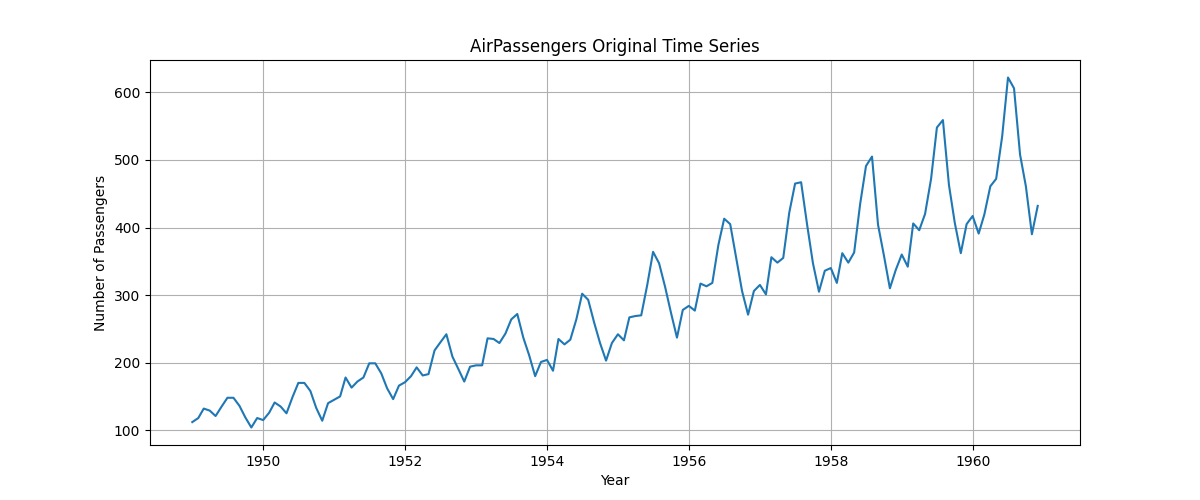

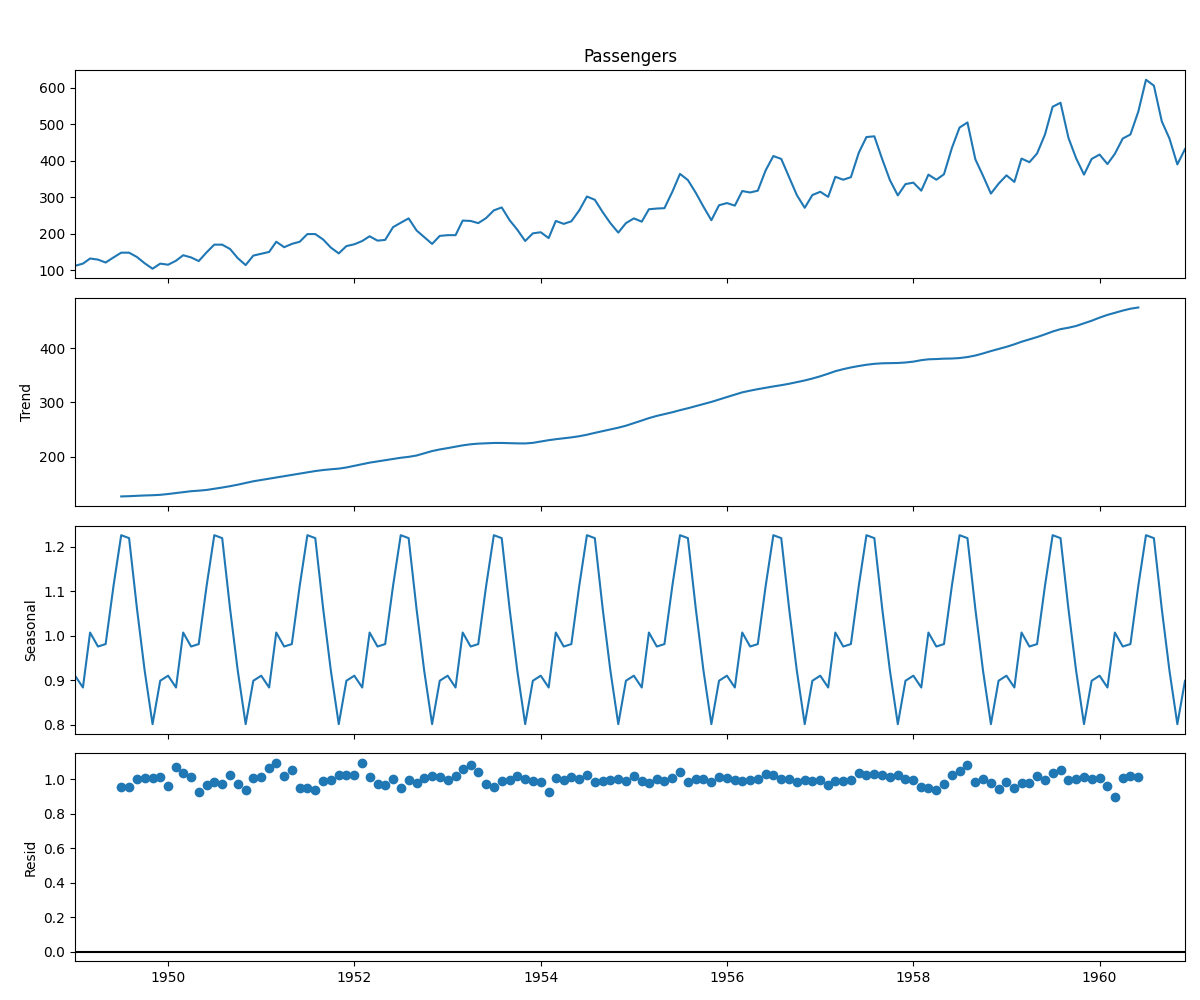

Original Series Plot: The first plot, airpassengers_original.png, shows the monthly airline passenger count from 1949 to 1960. It clearly displays a strong upward trend (more people are flying over time) and a distinct seasonal pattern (a peak in passengers every summer).

Decomposition Plot: The second plot, airpassengers_decomposition.png, breaks the series down into its four components:

Observed: The original time series.

Trend: A smooth line showing the long-term upward movement.

Seasonal: A repeating wave pattern, showing the regular peak and trough each year.

Residual: The remaining "noise" after removing the trend and seasonal components.

**7. Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.**

/tmp/ipython-input-1339354413.py:8: DtypeWarning: Columns (3,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('nyc_taxi.csv', nrows=100000, usecols=cols_to_use)


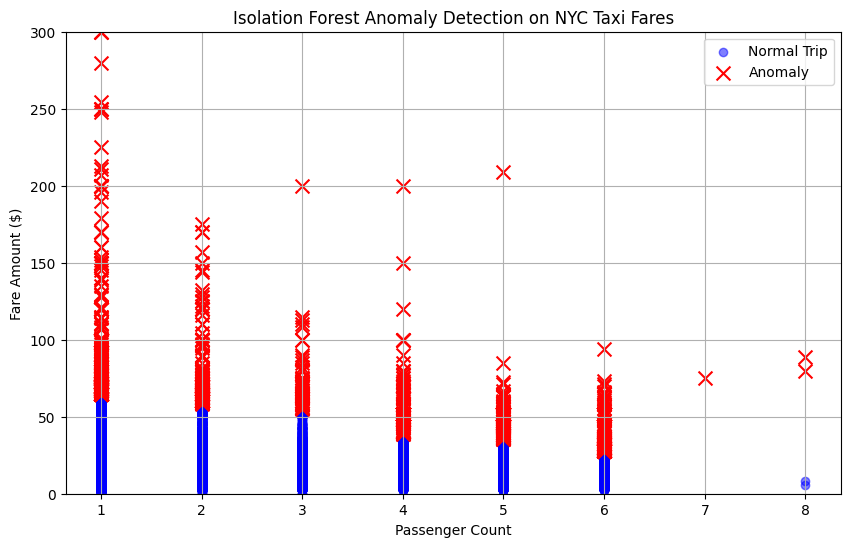

Total trips processed: 98044
Anomalies detected: 975
Example anomalies:
      passenger_count  fare_amount  anomaly
152                 5         39.5       -1
687                 2         66.5       -1
790                 2        144.0       -1
944                 5         42.0       -1
1191                4         62.5       -1


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

try:
    cols_to_use = ['fare_amount', 'passenger_count']

    df = pd.read_csv('nyc_taxi.csv', nrows=100000, usecols=cols_to_use)

    df['fare_amount'] = pd.to_numeric(df['fare_amount'], errors='coerce')
    df['passenger_count'] = pd.to_numeric(df['passenger_count'], errors='coerce')

    df = df.dropna(subset=['fare_amount', 'passenger_count'])

    df['passenger_count'] = df['passenger_count'].astype(int)

    df = df[(df['fare_amount'] > 0) & (df['passenger_count'] > 0)]

    features = ['fare_amount', 'passenger_count']
    X = df[features]

    # Isolation Forest
    # We set a 'contamination' level (expected % of anomalies)
    iso_forest = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
    y_pred = iso_forest.fit_predict(X)

    # The model predicts 1 for inliers and -1 for outliers (anomalies)
    df['anomaly'] = y_pred
    anomalies = df[df['anomaly'] == -1]
    inliers = df[df['anomaly'] == 1]

    plt.figure(figsize=(10, 6))
    plt.title("Isolation Forest Anomaly Detection on NYC Taxi Fares")

    # Plot the inliers (normal data)
    plt.scatter(inliers['passenger_count'], inliers['fare_amount'],
                c='blue', label='Normal Trip', alpha=0.5)

    # Plot the anomalies (outliers)
    plt.scatter(anomalies['passenger_count'], anomalies['fare_amount'],
                c='red', marker='x', s=100, label='Anomaly')

    plt.xlabel('Passenger Count')
    plt.ylabel('Fare Amount ($)')
    plt.ylim(0, 300)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Total trips processed: {len(X)}")
    print(f"Anomalies detected: {len(anomalies)}")
    print("Example anomalies:")
    print(anomalies.head())

except FileNotFoundError:
    print("Error: 'nyc_taxi.csv' not found.")
    print("Please download the file from the link, save it as 'nyc_taxi.csv',")
    print("and place it in the same directory as this script.")

except Exception as e:
    print(f"An error occurred: {e}")

**Visualization**: The plot shows "Passenger Count" vs. "Fare Amount." The vast majority of trips are plotted as blue dots, clustered at 1-2 passengers and with fares under $100. The anomalies, marked with red 'x's, represent trips that deviate from this norm, such as trips with very high fares or an unusually high number of passengers (e.g., 5 or 6) combined with a high fare.

**8. Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.**


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.tseries.offsets import DateOffset

file_path = 'AirPassengers.csv'
data = pd.read_csv(file_path, parse_dates=['Month'], index_col='Month')
data.columns = ['Passengers']

# SARIMA model
# using standard (p,d,q)(P,D,Q,m) model
# (p,d,q) = (1,1,1) for non-seasonal components
# (P,D,Q,m) = (1,1,1,12) for seasonal components with a 12-month period
model = sm.tsa.statespace.SARIMAX(data['Passengers'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = model.fit()
print("SARIMA model trained successfully.")

forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int(alpha=0.05) # 95% confidence interval

plt.figure(figsize=(14, 7))
plt.title('SARIMA Forecast for AirPassengers')

plt.plot(data, label='Historical Data')

plt.plot(forecast_mean, label='Forecast (Next 12 Months)', color='red', linestyle='--')

plt.fill_between(forecast_ci.index,
                 forecast_ci.iloc[:, 0],
                 forecast_ci.iloc[:, 1], color='pink', alpha=0.5,
                 label='95% Confidence Interval')

plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('sarima_forecast.png')
plt.close()

print("Forecast plot saved as sarima_forecast.png")

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


SARIMA model trained successfully.
Forecast plot saved as sarima_forecast.png


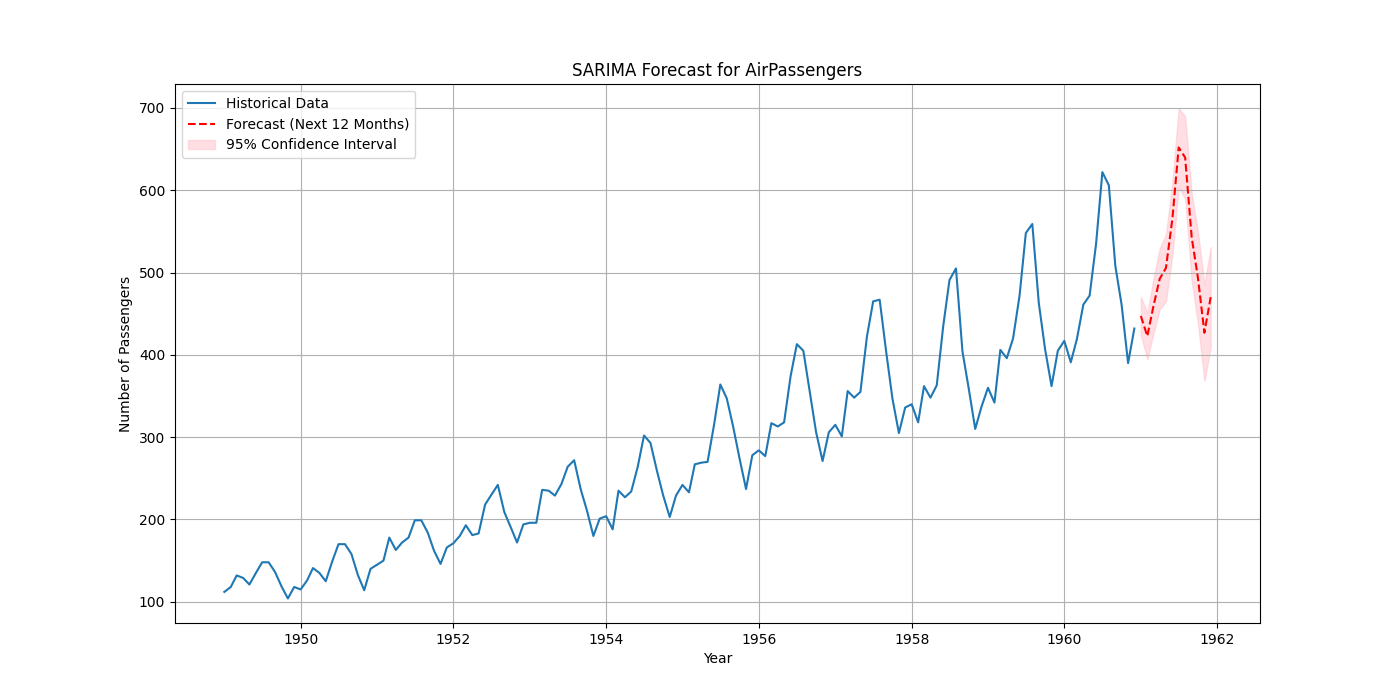

Visualization: The plot shows the original historical passenger data in blue. Appended to the end of this line is a red dashed line, representing the model's forecast for the next 12 months. This forecast line continues the upward trend and the seasonal pattern of the original data. A pink shaded area around the forecast represents the 95% confidence interval, which grows wider further into the future, indicating increasing uncertainty.

**9. Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib**

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.datasets import make_blobs

X_inliers, y_inliers = make_blobs(n_samples=300, centers=[[0, 0]],
                                 cluster_std=0.5, random_state=42)

rng = np.random.RandomState(42)
X_outliers = rng.uniform(low=-5, high=5, size=(30, 2))
X = np.vstack([X_inliers, X_outliers])

# Local Outlier Factor (LOF)
# n_neighbors is a key parameter; 20 is a common default
# contamination is the expected proportion of outliers (30 / 330)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

# fit_predict() to get the labels for the training data
# It returns 1 for inliers and -1 for outliers (anomalies)
y_pred_lof = lof.fit_predict(X)

anomalies_mask_lof = y_pred_lof == -1

plt.figure(figsize=(10, 6))
plt.title("Local Outlier Factor (LOF) Anomaly Detection")

# the inliers (predicted as normal)
plt.scatter(X[~anomalies_mask_lof, 0], X[~anomalies_mask_lof, 1],
            c='blue', label='Inlier')

# the anomalies (predicted as outliers)
plt.scatter(X[anomalies_mask_lof, 0], X[anomalies_mask_lof, 1],
            c='red', marker='x', s=100, label='Anomaly')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.savefig('lof_anomalies.png')
plt.close()

print("LOF anomaly plot saved as lof_anomalies.png")

LOF anomaly plot saved as lof_anomalies.png


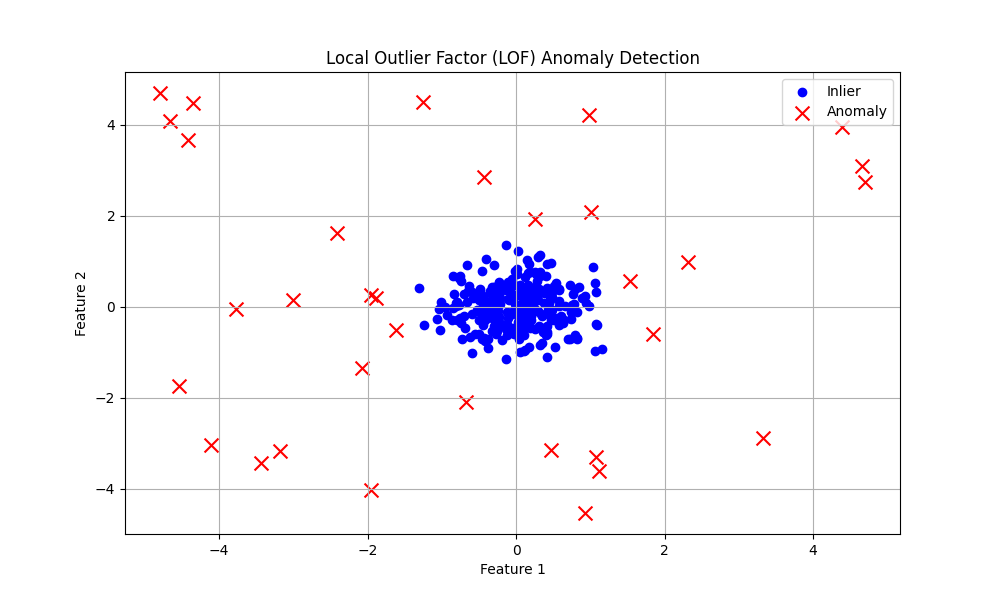

Visualization: The plot displays the synthetic data. A dense cluster of blue dots ("Inlier") is visible at the center. Surrounding this cluster are several red 'x' markers ("Anomaly"), representing the scattered data points that LOF successfully identified as outliers because their local density is much lower than that of their neighbors (the inliers).

**10. You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in real-time consumption data collected every 15 minutes. The dataset includes features like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:**

- **How would you detect anomalies in this streaming data (Isolation Forest / LOF / DBSCAN)?**
- **Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?**
- **How would you validate and monitor the performance over time?**

- **How would this solution help business decisions or operations?**

For real-time streaming data collected every 15 minutes, Isolation Forest is the best choice.

**Reasoning:**

Speed: Real-time detection is a "big data analytics problem" that requires high efficiency. Isolation Forest has a low time complexity and memory requirement, making it much faster than LOF or DBSCAN, which are computationally expensive as they rely on distance calculations.

**Effectiveness:** It is robust, scales well to many features (e.g., region, weather, usage), and is effective at identifying "few and different" spikes or drops in consumption.

**Workflow:** A "Lambda architecture" could be implemented:

**Speed Layer:** A lightweight, pre-trained Isolation Forest model scores incoming data points in real-time to flag immediate, obvious anomalies.

**Batch Layer:** A more robust model is retrained nightly on all historical data to update the "normal" profile and prevent model drift.

The best choice is SARIMAX (Seasonal Autoregressive Integrated Moving Average with eXogenous variables).

**Reasoning:**

The dataset explicitly includes external features: "weather conditions" and "region."

Energy demand is highly Seasonal (e.g., daily peaks, weekly cycles, and yearly patterns). This requires the 'S' (Seasonal) component.

The 'X' (eXogenous) component is critical. It allows the model to "integrate weather factors" (like temperature or cloud cover) and other factors (like "region" or "holiday" status) directly into the forecast. This makes the SARIMAX model significantly more powerful than a SARIMA model, which would only look at past energy usage.

**Initial Validation (Backtesting):**

Split the historical data into a training set (e.g., the first 80%) and a hold-out test set (the last 20%).

Train the SARIMAX model on the training set.

Generate forecasts on the test set and measure accuracy using metrics like MAPE (Mean Absolute Percentage Error) or RMSE (Root Mean Square Error).

For the anomaly model, check the "anomalies" it flags in the test set against known historical events (if any) to evaluate its precision.

**Monitoring in Production:**

**Forecast Monitoring:** Continuously track the forecast error (e.g., MAPE) of the live model. If the error "drifts" and consistently increases, it indicates that the "time series characteristics" have shifted, and the model needs to be retrained or re-tuned.

**Anomaly Monitoring:** Track the rate of anomalies. A sudden spike in the number of detected anomalies might not mean the grid is failing; it could mean the model is stale (what it thinks is "anomalous" is now normal) and needs to be retrained.

This dual solution provides significant business value:

**Operational Efficiency (from Forecasting):** Accurately forecasting demand allows the company to optimize load balancing, ensuring they generate or purchase the right amount of energy. This prevents blackouts (from under-forecasting) and avoids wasting money on excess power generation (from over-forecasting).

**Grid Stability & Security (from Anomaly Detection):** Real-time anomaly detection can "identify unusual consumption behaviors". This serves as an early warning system for:

**Equipment Failure:** A sudden, sustained drop in a region could signal a failed transformer.

**Energy Theft:** A sudden, unusual spike at a specific location could indicate "energy leakage and theft".

**Grid Instability:** Rapid spikes and drops could signal instability that requires immediate intervention to prevent a wider-scale outage.